In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn import metrics

In [36]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df = df.drop(columns=["customerID"])

# Preprocessing

In [37]:
columns_to_drop=['gender','MultipleLines','InternetService','PhoneService','StreamingMovies']
df = df.drop(columns=columns_to_drop)
df.head()

,Churn,Contract,Dependents,DeviceProtection,MonthlyCharges,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,SeniorCitizen,StreamingTV,TechSupport,tenure,TotalCharges
0,0,Month-to-month,0,No,59.90,No,No,0,0,Mailed check,0,No,No,9,542.40
1,0,Month-to-month,1,No,69.40,No,No,1,0,Credit card (automatic),0,Yes,Yes,9,571.45
2,0,Month-to-month,0,No,48.20,No,Yes,1,0,Electronic check,1,No,No,7,340.35
3,0,Month-to-month,0,No,68.95,No,No,1,1,Electronic check,0,No,No,5,351.50
4,0,Month-to-month,0,No,72.10,No,No,1,0,Electronic check,1,No,No,1,72.10


In [74]:
cat=['Contract','DeviceProtection','OnlineBackup','OnlineSecurity','PaymentMethod','TechSupport','StreamingTV']
#df['NoInternetService'] = df['StreamingTV'].apply(lambda x: 1 if x == 'No internet service' else 0)
df[cat] = df[cat].replace('No internet service', 'No')
df


,Churn,Contract,Dependents,DeviceProtection,MonthlyCharges,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,SeniorCitizen,StreamingTV,TechSupport,tenure,TotalCharges
0,0,Month-to-month,0,No,59.90,No,No,0,0,Mailed check,0,No,No,9,542.40
1,0,Month-to-month,1,No,69.40,No,No,1,0,Credit card (automatic),0,Yes,Yes,9,571.45
2,0,Month-to-month,0,No,48.20,No,Yes,1,0,Electronic check,1,No,No,7,340.35
3,0,Month-to-month,0,No,68.95,No,No,1,1,Electronic check,0,No,No,5,351.50
4,0,Month-to-month,0,No,72.10,No,No,1,0,Electronic check,1,No,No,1,72.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,Two year,1,Yes,92.45,Yes,Yes,0,1,Credit card (automatic),1,Yes,Yes,72,6440.25
7039,1,Two year,1,Yes,79.40,Yes,Yes,0,1,Credit card (automatic),1,Yes,Yes,66,5154.60
7040,1,Two year,1,Yes,103.40,Yes,No,1,1,Electronic check,0,Yes,No,72,7372.65
7041,1,Two year,0,Yes,116.20,Yes,Yes,0,0,Credit card (automatic),0,Yes,Yes,67,7752.30


In [39]:
num=['Dependents','MonthlyCharges','PaperlessBilling','Partner','SeniorCitizen','tenure']
y = df['Churn']
X = df.drop(columns=['Churn'])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

totalcharges_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num),
        ('totalcharges', totalcharges_transformer, ['TotalCharges']),
        ('cat', cat_transformer, cat)
    ])

In [40]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Dependents', 'MonthlyCharges',
                                  'PaperlessBilling', 'Partner',
                                  'SeniorCitizen', 'tenure']),
                                ('totalcharges',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Contract', 'DeviceProtection',
                                  'OnlineBackup', 'OnlineSecurity',
                                  'PaymentMethod', 'TechSupport',
                                  'StreamingTV'])])

In [41]:
df.head()

,Churn,Contract,Dependents,DeviceProtection,MonthlyCharges,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,SeniorCitizen,StreamingTV,TechSupport,tenure,TotalCharges
0,0,Month-to-month,0,No,59.90,No,No,0,0,Mailed check,0,No,No,9,542.40
1,0,Month-to-month,1,No,69.40,No,No,1,0,Credit card (automatic),0,Yes,Yes,9,571.45
2,0,Month-to-month,0,No,48.20,No,Yes,1,0,Electronic check,1,No,No,7,340.35
3,0,Month-to-month,0,No,68.95,No,No,1,1,Electronic check,0,No,No,5,351.50
4,0,Month-to-month,0,No,72.10,No,No,1,0,Electronic check,1,No,No,1,72.10


# Modélisation

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Dummy classifier

In [43]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Dependents',
                                                   'MonthlyCharges',
                                                   'PaperlessBilling',
                                                   'Partner', 'SeniorCitizen',
                                                   'tenure']),
                                                 ('totalcharges',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract',
                                                   'DeviceProtection',
                                                   'OnlineBackup',
                                                   'OnlineSecurity',
                                                   'PaymentMethod',
                                                   'TechSupport',
                                                   'StreamingTV'])])),
                ('classifier', DummyClassifier(strategy='most_frequent'))])

In [44]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Dependents',
                                                   'MonthlyCharges',
                                                   'PaperlessBilling',
                                                   'Partner', 'SeniorCitizen',
                                                   'tenure']),
                                                 ('totalcharges',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract',
                                                   'DeviceProtection',
                                                   'OnlineBackup',
                                                   'OnlineSecurity',
                                                   'PaymentMethod',
                                                   'TechSupport',
                                                   'StreamingTV'])])),
                ('classifier', DummyClassifier(strategy='most_frequent'))])

In [45]:
prediction_test = model_pipeline.predict(X_test)

In [46]:
accuracy = metrics.accuracy_score(y_test, prediction_test)
classification_report_str = metrics.classification_report(y_test, prediction_test)

/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rayan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [47]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.7382867960246096
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1560
           1       0.00      0.00      0.00       553

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.55      0.74      0.63      2113



## Regression Logistique

In [48]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Dependents',
                                                   'MonthlyCharges',
                                                   'PaperlessBilling',
                                                   'Partner', 'SeniorCitizen',
                                                   'tenure']),
                                                 ('totalcharges',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract',
                                                   'DeviceProtection',
                                                   'OnlineBackup',
                                                   'OnlineSecurity',
                                                   'PaymentMethod',
                                                   'TechSupport',
                                                   'StreamingTV'])])),
                ('classifier', LogisticRegression())])

In [49]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Dependents',
                                                   'MonthlyCharges',
                                                   'PaperlessBilling',
                                                   'Partner', 'SeniorCitizen',
                                                   'tenure']),
                                                 ('totalcharges',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract',
                                                   'DeviceProtection',
                                                   'OnlineBackup',
                                                   'OnlineSecurity',
                                                   'PaymentMethod',
                                                   'TechSupport',
                                                   'StreamingTV'])])),
                ('classifier', LogisticRegression())])

In [50]:
prediction_test = model_pipeline.predict(X_test)

In [51]:
accuracy = metrics.accuracy_score(y_test, prediction_test)
classification_report_str = metrics.classification_report(y_test, prediction_test)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.8135352579271179
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1560
           1       0.68      0.55      0.61       553

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



## Oversampling

In [52]:
majorite_class = df[df['Churn']==0]
minorite_class = df[df['Churn']==1]

minorite_augmentation = resample(minorite_class, replace=True, n_samples=len(majorite_class), random_state=42)

df_balanced = pd.concat([majorite_class, minorite_augmentation])
print(df_balanced['Churn'].value_counts())


Churn
0    5174
1    5174
Name: count, dtype: int64


In [53]:
y = df_balanced['Churn']
X = df_balanced.drop(columns=['Churn'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Dependents',
                                                   'MonthlyCharges',
                                                   'PaperlessBilling',
                                                   'Partner', 'SeniorCitizen',
                                                   'tenure']),
                                                 ('totalcharges',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract',
                                                   'DeviceProtection',
                                                   'OnlineBackup',
                                                   'OnlineSecurity',
                                                   'PaymentMethod',
                                                   'TechSupport',
                                                   'StreamingTV'])])),
                ('classifier', LogisticRegression())])

In [56]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Dependents',
                                                   'MonthlyCharges',
                                                   'PaperlessBilling',
                                                   'Partner', 'SeniorCitizen',
                                                   'tenure']),
                                                 ('totalcharges',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract',
                                                   'DeviceProtection',
                                                   'OnlineBackup',
                                                   'OnlineSecurity',
                                                   'PaymentMethod',
                                                   'TechSupport',
                                                   'StreamingTV'])])),
                ('classifier', LogisticRegression())])

In [57]:
prediction_test = model_pipeline.predict(X_test)

In [58]:
accuracy = metrics.accuracy_score(y_test, prediction_test)
classification_report_str = metrics.classification_report(y_test, prediction_test)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.7578099838969404
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      1548
           1       0.73      0.81      0.77      1557

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



## Cross Validation

In [59]:
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='recall')
print("Score Validité Croisée :", cv_scores)

Score Validité Croisée : [0.80497925 0.79281768 0.79696133 0.78976487 0.82434302]


## Hyper Paramétre

In [60]:
new_regress=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))])

In [61]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(new_regress, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Dependents',
                                                                          'MonthlyCharges',
                                                                          'PaperlessBilling',
                                                                          'Partner',
                                                                          'SeniorCitizen',
                                                                          'tenure']),
                                                                        ('totalcharges',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder())]),
                                                                         ['Contract',
                                                                          'DeviceProtection',
                                                                          'OnlineBackup',
                                                                          'OnlineSecurity',
                                                                          'PaymentMethod',
                                                                          'TechSupport',
                                                                          'StreamingTV'])])),
                                       ('classifier',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='recall')

In [62]:
prediction_test = grid_search.predict(X_test)

In [63]:
accuracy = metrics.accuracy_score(y_test, prediction_test)
classification_report_str = metrics.classification_report(y_test, prediction_test)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.7581320450885668
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      1548
           1       0.73      0.81      0.77      1557

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



In [64]:
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision sur l'ensemble de validation croisée :", grid_search.best_score_)
print("Précision sur l'ensemble de test :", recall_score(y_test, prediction_test))

Meilleurs paramètres : {'classifier__C': 10, 'classifier__penalty': 'l1'}
Meilleure précision sur l'ensemble de validation croisée : 0.8026031040095367
Précision sur l'ensemble de test : 0.8143866409762364


In [76]:
best_model = grid_search.best_estimator_
new_df=pd.read_csv("Telco-Customer-Churn.csv")
new_df[cat] = new_df[cat].replace('No internet service', 'No')

predictions = best_model.predict(new_df)
probabilities = best_model.predict_proba(new_df)
new_df['Predictions'] = predictions
new_df['Probability_retention'] = probabilities[:, 0]
new_df['Probability_churn'] = probabilities[:, 1]
print(new_df)
new_df.to_csv('churn_predictions.csv', index=False)


      Churn        Contract  customerID  Dependents DeviceProtection  gender  \
0         0  Month-to-month  0003-MKNFE           0               No    Male   
1         0  Month-to-month  0013-MHZWF           1               No  Female   
2         0  Month-to-month  0015-UOCOJ           0               No  Female   
3         0  Month-to-month  0018-NYROU           0               No  Female   
4         0  Month-to-month  0021-IKXGC           0               No  Female   
...     ...             ...         ...         ...              ...     ...   
7038      1        Two year  8580-QVLOC           1              Yes  Female   
7039      1        Two year  8631-NBHFZ           1              Yes    Male   
7040      1        Two year  8809-RIHDD           1              Yes    Male   
7041      1        Two year  9053-JZFKV           0              Yes    Male   
7042      1        Two year  9412-ARGBX           1              Yes  Female   

     InternetService  MonthlyCharges Mu

## SVC pipepline

In [31]:
svc_pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())])
svc_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Dependents',
                                                   'MonthlyCharges',
                                                   'PaperlessBilling',
                                                   'Partner', 'SeniorCitizen',
                                                   'tenure']),
                                                 ('totalcharges',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract',
                                                   'DeviceProtection',
                                                   'OnlineBackup',
                                                   'OnlineSecurity',
                                                   'PaymentMethod',
                                                   'TechSupport',
                                                   'StreamingTV'])])),
                ('classifier', SVC())])

In [32]:
cv_scores = cross_val_score(svc_pipeline, X_train, y_train, cv=5, scoring='recall')
print("Score Validité Croisée :", cv_scores)

Score Validité Croisée : [0.81742739 0.8121547  0.81491713 0.78008299 0.82987552]


### Hyper paramétre SVC

In [33]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [80]:
y_pred = grid_search.predict(X_test)

In [81]:
accuracy = metrics.accuracy_score(y_test, y_pred)
classification_report_str = metrics.classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.7581320450885668
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      1548
           1       0.73      0.81      0.77      1557

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



In [82]:
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision sur l'ensemble de validation croisée :", grid_search.best_score_)
print("Précision sur l'ensemble de test :", recall_score(y_test, y_pred))

Meilleurs paramètres : {'classifier__C': 10, 'classifier__penalty': 'l1'}
Meilleure précision sur l'ensemble de validation croisée : 0.8026031040095367
Précision sur l'ensemble de test : 0.8143866409762364


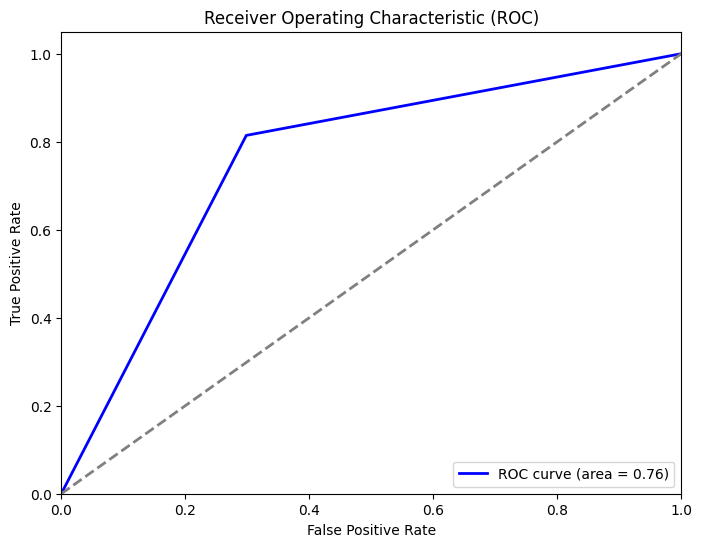

In [85]:
y_prob = model_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

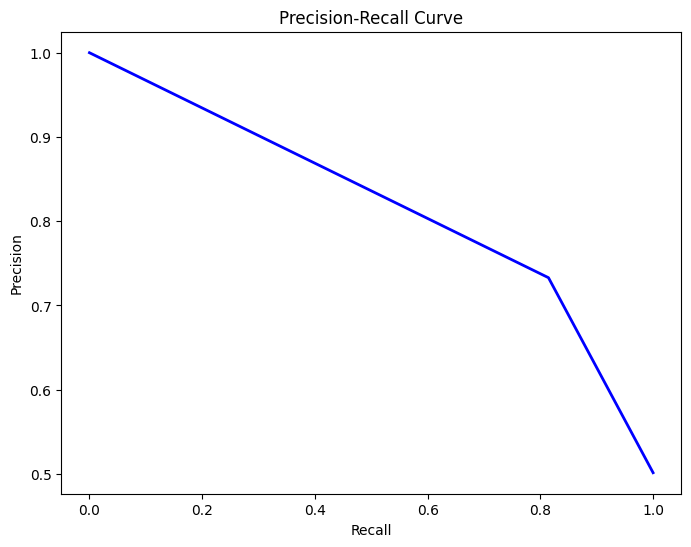

In [86]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()